<a href="https://colab.research.google.com/github/moaadouhmad99-ops/DI_Bootcamp/blob/main/Week6/Day1/ExercisesXPGold_W6_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises XP Gold: Student Notebook

This notebook is guided to complete the execices on the plateforme.
For each exercise, the **Instructions** are guided and some parts are already coded, and the **Guidance** explains exactly what you must do in complete sentences.

## What will you create
- calculation sheets for metrics like Accuracy, Precision, Recall, and F1-Score based on given confusion matrix values.
- develop strategic proposals that address specific challenges posed by these issues.
- build frameworks for evaluating classification models in different scenarios, especially focusing on the impact of class imbalance and the role of threshold tuning.

## What will you learn
- Understand and interpret the confusion matrix in different scenarios.
- Understand the trade-offs between different evaluation metrics.
- Explore the concepts of cross-validation and learning curves.

## Exercise 1 : Analyzing Confusion Matrix

### Instructions
Imagine you have a dataset for a binary classification problem, such as email spam detection, where emails are classified as either ‘Spam’ or ‘Not Spam’. You are provided with the confusion matrix results of a classifier.
- Define in your own words what True Positives, True Negatives, False Positives, and False Negatives mean in the context of this email spam detection problem.
- Given a confusion matrix with specific values for TP, TN, FP, FN, calculate the Accuracy, Precision, Recall, and F1-Score.
- Discuss how the classifier’s performance would change with a higher number of False Positives compared to False Negatives, and vice versa.

### Guidance
- You will start by writing complete sentences that define True Positives, True Negatives, False Positives, and False Negatives using the spam example.
- You will then run the prefilled code to enter TP, TN, FP, and FN and compute the four metrics.
- You will also generate a calculation sheet that tabulates the metrics so you can export or present the results.
- You will finish by writing a paragraph that explains how increasing False Positives versus increasing False Negatives changes the behavior and implications of the classifier.

In [1]:

# This piece of code is already prefilled, run it to execute it and see the results.
# Enter the confusion matrix values as integers and execute the cell to compute the metrics.

# TP: predicted Spam and actually Spam
# TN: predicted Not Spam and actually Not Spam
# FP: predicted Spam but actually Not Spam
# FN: predicted Not Spam but actually Spam

TP = 50   # replace with your value
TN = 920  # replace with your value
FP = 30   # replace with your value
FN = 20   # replace with your value

total = TP + TN + FP + FN
accuracy  = (TP + TN) / total if total else 0.0
precision = TP / (TP + FP) if (TP + FP) else 0.0
recall    = TP / (TP + FN) if (TP + FN) else 0.0
f1_score  = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0.0

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1_score, 4))

Accuracy: 0.951
Precision: 0.625
Recall: 0.7143
F1-Score: 0.6667


In [6]:

# This piece of code is already prefilled, run it to execute it and see the results.
# It builds a calculation sheet as a small table and saves it to CSV for reporting.

import pandas as pd

calc_sheet = pd.DataFrame([{
    "TP": TP, "TN": TN, "FP": FP, "FN": FN,
    "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1_score
}])

print(calc_sheet)
csv_path = "confusion_metrics_sheet.csv"
calc_sheet.to_csv(csv_path, index=False)
print("Saved CSV to:", csv_path)

   TP   TN  FP  FN  Accuracy  Precision    Recall  F1-Score
0  50  920  30  20   0.95098      0.625  0.714286  0.666667
Saved CSV to: confusion_metrics_sheet.csv


## **Definitions (in the context of spam detection)**

**True Positives (TP)**: These are emails that the classifier correctly identifies as Spam when they are indeed spam.
Example: A real spam email offering fake prizes is predicted as spam.

**True Negatives (TN)**: These are emails that the classifier correctly identifies as Not Spam when they are genuinely not spam.
Example: A legitimate work email is predicted as not spam.

**False Positives (FP)**: These occur when the classifier predicts an email as Spam, but it is actually Not Spam.
Example: An important email from your boss being mistakenly moved to the spam folder.

**False Negatives (FN)**: These occur when the classifier predicts an email as Not Spam, but it is actually Spam.
Example: A phishing email enters your inbox because the classifier failed to recognize it as spam.

## Exercise 2 : Evaluating Trade-offs in Metrics

### Instructions
Consider a medical diagnosis application where a model predicts whether patients have a certain disease.
- Explain why high recall is more important than high precision in this medical diagnosis context.
- Describe a scenario where precision becomes more important than recall.
- Discuss the potential consequences of focusing solely on improving accuracy in imbalanced datasets.

### Guidance
- You will write one paragraph that explains why high recall is often prioritized in disease screening and why missing positive cases is risky.
- You will then write one paragraph that presents a realistic scenario where precision is more important than recall and you will justify your choice.
- You will close with one paragraph that explains why accuracy can be misleading on imbalanced datasets and what risks this creates for decisions.

### My answer
In medical diagnosis, high recall is crucial because missing patients who actually have the disease can lead to delayed treatment, worsening health outcomes, or even death. Catching as many true cases as possible outweighs the cost of false positives, which can be further investigated.

Precision becomes more important in scenarios like expensive or invasive confirmatory tests, where falsely identifying healthy patients as sick leads to unnecessary procedures, costs, and stress. Here, reducing false positives is critical to avoid harm and resource waste.

Focusing only on accuracy in imbalanced datasets can be misleading, as a model may predict the majority class well while ignoring the rare but critical positive cases. This creates a false sense of security and risks missing crucial detections, leading to poor decisions in high-stakes contexts.

## Exercise 3 : Understanding Cross-Validation and Learning Curves

### Instructions
You are working on a project with a large dataset that involves predicting housing prices based on various features.
- Explain the difference between K-Fold Cross-Validation and Stratified K-Fold Cross-Validation. Which one would you choose for this task and why?
- Describe what learning curves are and how they can help in understanding the performance of your model.
- Discuss the implications of underfitting and overfitting as observed from learning curves, and how you might address these issues.

### Guidance
- You will begin by explaining the difference between K-Fold and Stratified K-Fold in complete sentences and you will state which approach is suitable for this regression task and why.
- You will then run the prefilled code to generate a learning curve example using synthetic regression data.
- You will finally write a paragraph that interprets the learning curves, explains signs of underfitting and overfitting, and proposes practical actions to address each issue.

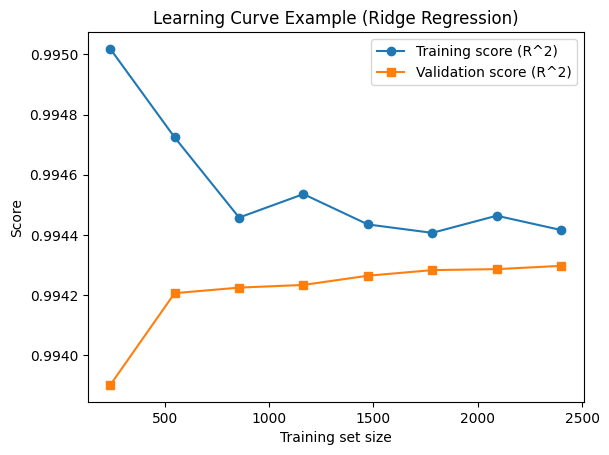

In [8]:

# This piece of code is already prefilled, run it to execute it and see the results.
# It generates a learning curve for a regression model using synthetic data.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import Ridge

X, y = make_regression(n_samples=3000, n_features=20, noise=15.0, random_state=42)
estimator = Ridge(alpha=1.0, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, valid_scores = learning_curve(
    estimator, X, y, cv=cv, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=None, shuffle=True, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_sizes, train_mean, marker="o", label="Training score (R^2)")
plt.plot(train_sizes, valid_mean, marker="s", label="Validation score (R^2)")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning Curve Example (Ridge Regression)")
plt.legend()
plt.show()

## ***My Answer:***
K-Fold Cross-Validation splits the dataset into
𝑘
 equal parts and cycles through each as validation, treating all samples equally. Stratified K-Fold ensures each fold preserves the target distribution, mainly useful for classification. For predicting housing prices (regression), standard K-Fold is sufficient since stratification is less critical.

Learning curves plot training and validation performance against dataset size, helping to identify whether a model is underfitting (low training and validation scores) or overfitting (high training but low validation scores).

From the learning curves, if both scores are low, the model underfits and may need a more complex model or feature engineering. If training scores are high but validation scores lag, the model overfits and can benefit from more data, regularization, or simpler architecture.

## Exercise 4 : Impact of Class Imbalance on Model Evaluation

### Instructions
Imagine you are working on a dataset for detecting a rare disease where only 2% of the instances are positive cases (have the disease).
- Explain why using accuracy as an evaluation metric might be misleading in this scenario.
- Discuss the importance of precision and recall in the context of this imbalanced dataset.
- Propose strategies you could use to more effectively evaluate and improve the model’s performance in this scenario, considering the imbalance in the dataset.

### Guidance
- You will write one paragraph that explains why a naive classifier can reach high accuracy by predicting the majority class in a highly imbalanced dataset.
- You will then write one paragraph that explains the roles of precision and recall in rare-disease detection and how they reflect different types of errors.
- You will finish with one paragraph that lists strategies to evaluate and improve performance, including stratified splits, class weights, resampling, appropriate metrics, and calibration.

In [9]:

# This piece of code is already prefilled, run it to execute it and see the results.
# It creates a simple illustration of class imbalance and baseline accuracy.

from collections import Counter
import numpy as np

y = np.array([1]*20 + [0]*980)  # 2 percent positives
counter = Counter(y)
majority_class = counter.most_common(1)[0][0]
baseline_accuracy = (y == majority_class).mean()

print("Class distribution:", counter)
print("Majority-class baseline accuracy:", round(baseline_accuracy, 4))
print("Reflect on why this accuracy is high yet uninformative for rare-disease detection.")

Class distribution: Counter({np.int64(0): 980, np.int64(1): 20})
Majority-class baseline accuracy: 0.98
Reflect on why this accuracy is high yet uninformative for rare-disease detection.


### ***My answer***
In highly imbalanced datasets like this rare-disease scenario, accuracy can be misleading because a naive model that predicts every patient as healthy (the majority class) would achieve 98% accuracy, despite failing to detect any actual disease cases. This high accuracy gives a false sense of performance and ignores the critical rare positives.

Precision and recall are more informative in this context. Recall measures how many true disease cases are correctly identified, which is crucial to avoid missing patients. Precision measures how many predicted positive cases are correct, helping reduce unnecessary alarms and interventions. Balancing both helps manage false negatives and false positives.

To evaluate and improve performance, one can use strategies such as stratified train-test splits to maintain class proportions, assign class weights in the model, apply resampling techniques (oversampling positives or undersampling negatives), use metrics like F1-score, precision-recall curves, or ROC-AUC, and calibrate predicted probabilities to better reflect true risks.

## Exercise 5 : Role of Threshold Tuning in Classification Models

### Instructions
You are evaluating a binary classification model that predicts whether a bank’s client will default on a loan. The model outputs a probability score between 0 and 1.
- Describe how changing the threshold for classifying a positive case (default) from 0.5 to 0.7 might affect the model’s precision and recall.
- Discuss the potential consequences of setting the threshold too high or too low in the context of loan default prediction.
- Explain how ROC (Receiver Operating Characteristic) curves and AUC (Area Under the Curve) can assist in finding the optimal threshold.

### Guidance
- You will write one paragraph that explains how increasing the threshold generally increases precision and decreases recall, while decreasing the threshold usually does the opposite.
- You will then write one paragraph that explains practical consequences of the threshold choice in loan default prediction for both false positives and false negatives.
- You will finally run the prefilled code to see how precision and recall change with the threshold and how the ROC curve and AUC summarize trade-offs.

Threshold  Precision  Recall
      0.1        0.4     1.0
      0.2        0.5     1.0
      0.3      0.727     1.0
      0.4      0.889     1.0
      0.5        1.0     1.0
      0.6        1.0     1.0
      0.7        1.0   0.875
      0.8        1.0     0.5
      0.9        1.0   0.125


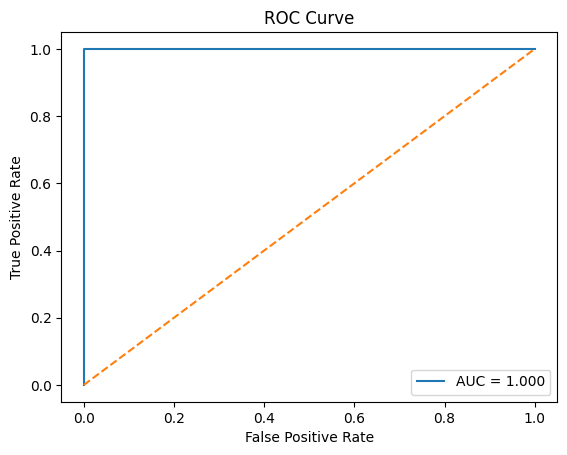

In [10]:

# This piece of code is already prefilled, run it to execute it and see the results.
# It evaluates precision and recall across thresholds and plots an ROC curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

# Example placeholders. Replace with your own true labels and predicted probabilities if available.
y_true = np.array([0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0])
y_pred_proba = np.array([0.10,0.82,0.12,0.65,0.28,0.73,0.33,0.21,0.88,0.19,0.77,0.40,0.27,0.91,0.31,0.18,0.79,0.29,0.84,0.22])

thresholds = np.linspace(0.1, 0.9, 9)
rows = []
for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    rows.append((round(t,2), round(prec,3), round(rec,3)))

print("Threshold  Precision  Recall")
for r in rows:
    print(f"{r[0]:>9}  {r[1]:>9}  {r[2]:>6}")

fpr, tpr, roc_th = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### ***My Answer***

Increasing the threshold from 0.5 to 0.7 generally raises precision, because only clients with higher predicted risk are labeled as defaulters, reducing false positives. However, recall decreases, as more true defaulters fall below the threshold and are missed. Lowering the threshold has the opposite effect: higher recall but lower precision.

In loan default prediction, a high threshold reduces false alarms (healthy clients incorrectly flagged) but risks missing real defaulters, potentially causing financial loss. A low threshold catches more defaulters but increases unnecessary interventions and costs due to false positives.

ROC curves and AUC summarize the trade-off between true positive rate (recall) and false positive rate across thresholds. They help select a threshold that balances precision and recall according to the bank’s risk tolerance.
